In [ ]:
pip install google_play_scraper

In [40]:
import re 
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm import tqdm
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app


%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

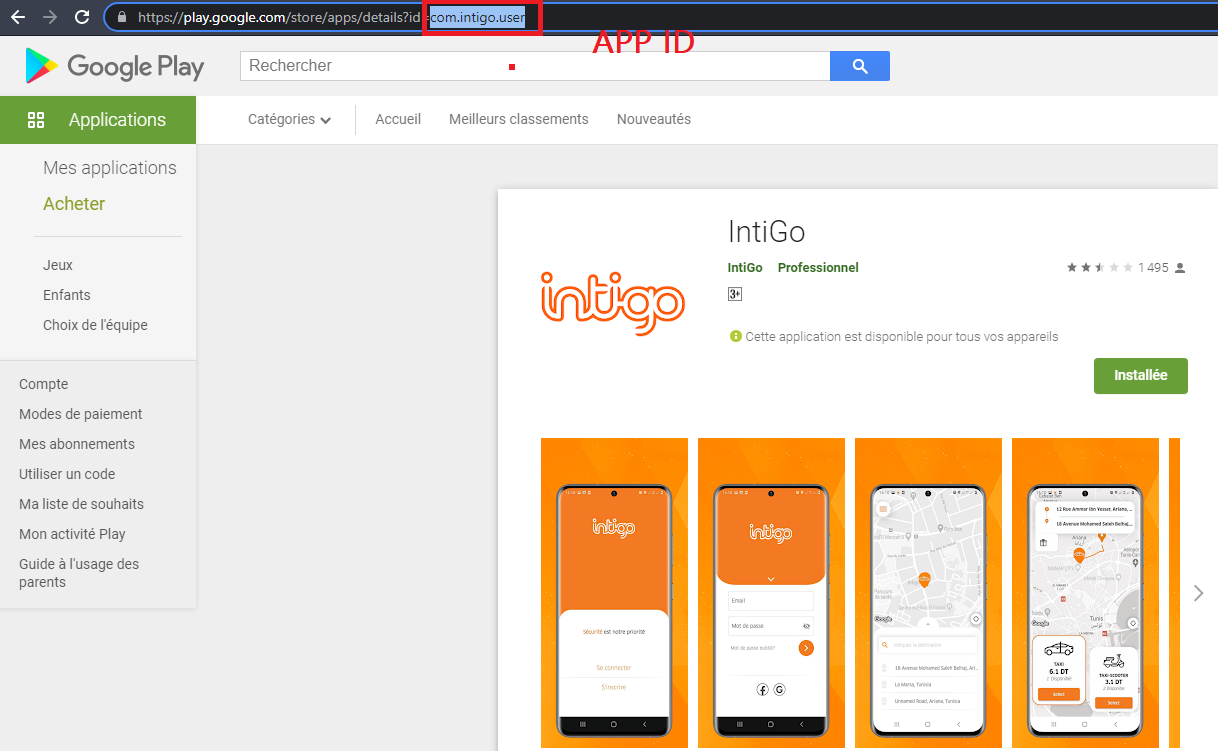

In [26]:
app_packages = [
'com.medianet.farmasi',
'com.medianet.exist',
'com.medianet.webank',
'tn.com.attijarirealtime.mobile',
'com.skodin.tunisiandinar',
'com.benjmaa.tndcurrency',
'mobi.dotit.zitouna',
'com.biatnet.mobile',
'com.kaoun.flouci',
'com.pixelstrade.stb',
'com.carrefour.creova.carrefourmobile',
'com.pixels.bt.app',
'mobi.dotit.bh',
'com.uib.uibmobile',
'tn.com.atb.atbmobile',
'com.albaraka.freedom2',
'com.Orange.SupTn',
'com.salem.customer',
'com.tunisietelecom.selfcare',
'com.chancia.traveltodo',
'com.amadeus.merci.tu',
'io.smartMed.medtn',
'com.touneslina.smartupgremda'
]

In [28]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 23/23 [00:03<00:00,  6.12it/s]


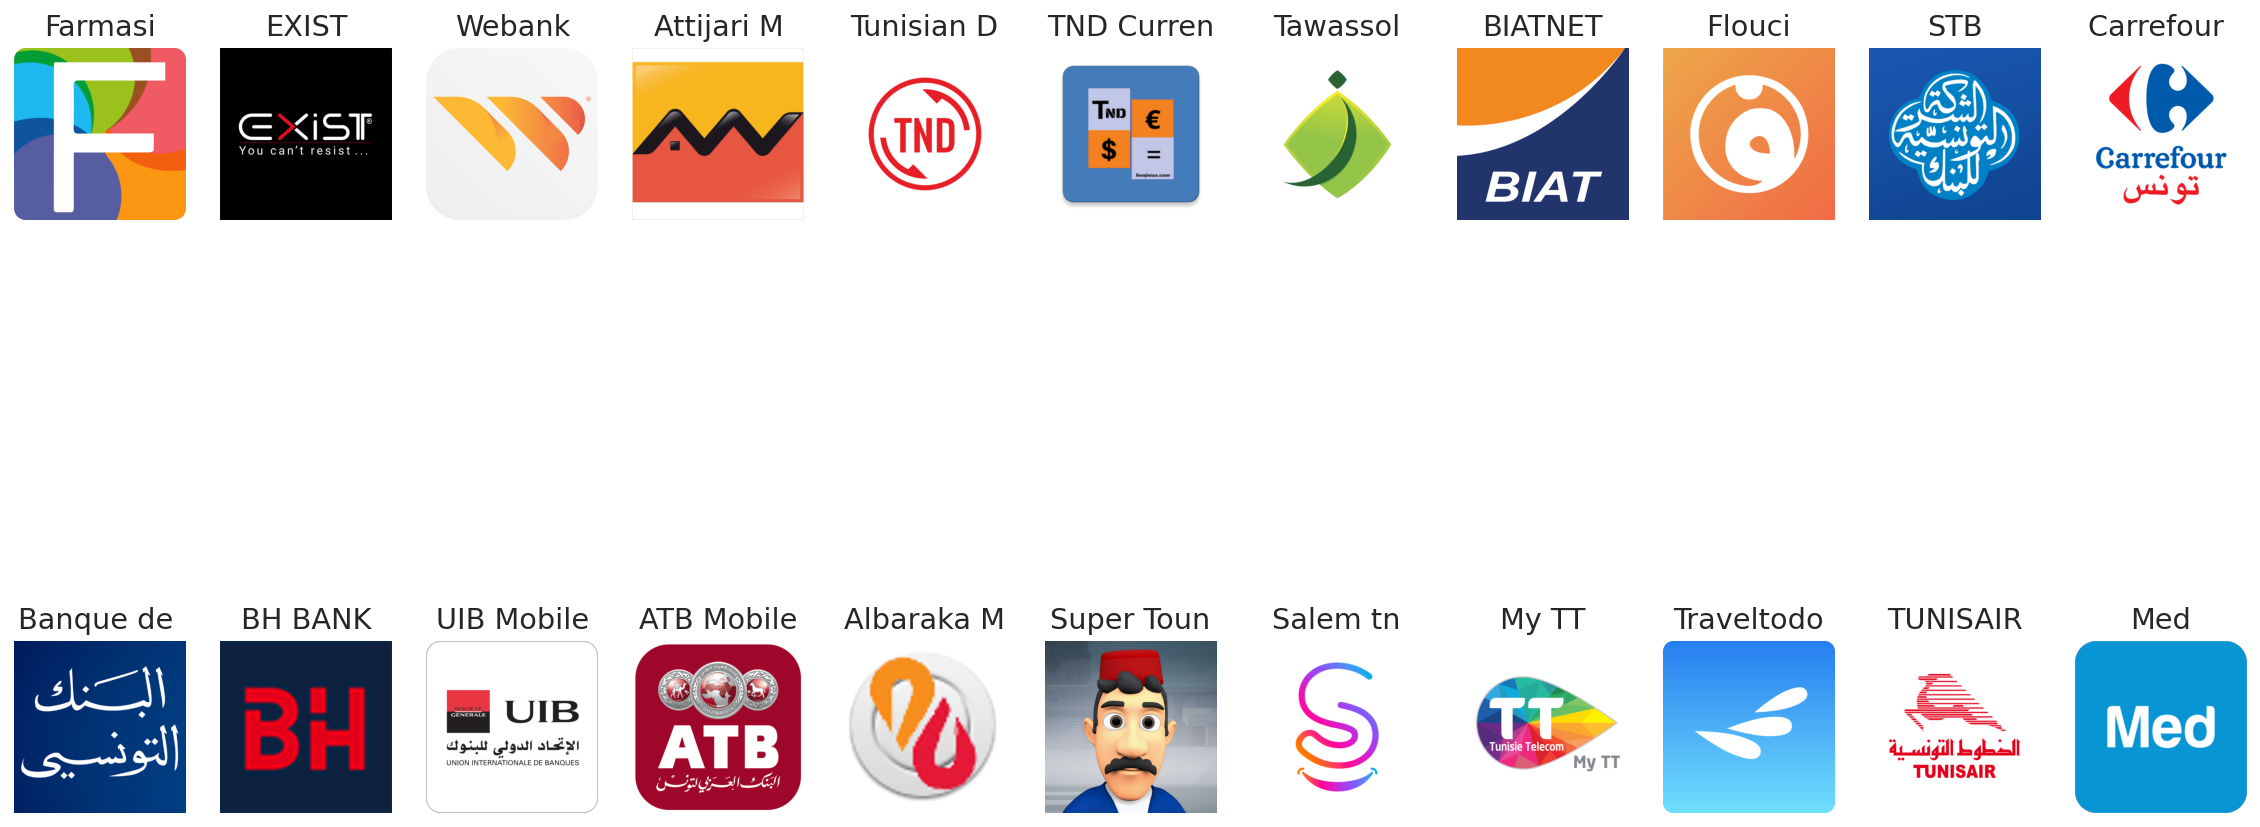

In [29]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(20, 10))
for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df

In [31]:

app_reviews = []
from google_play_scraper import Sort, reviews_all

for ap in tqdm(app_packages):
  rvs = reviews_all(
        ap,
        sleep_milliseconds=0, # defaults to 0
        lang='fr', # defaults to 'en'
        country='tn', # defaults to 'us'
        sort=Sort.MOST_RELEVANT # defaults to Sort.MOST_RELEVANT
        # defaults to None(means all score)
    )
  
  app_reviews.extend(rvs)

  rvs1 = reviews_all(
  ap,
  sleep_milliseconds=0, # defaults to 0
  lang='ar', # defaults to 'en'
  country='tn', # defaults to 'us'
  sort=Sort.MOST_RELEVANT # defaults to Sort.MOST_RELEVANT
    # defaults to None(means all score)
  )
  
  app_reviews.extend(rvs1)
  

100%|██████████| 23/23 [00:20<00:00,  1.10it/s]


In [34]:
app_reviews_df=pd.DataFrame(app_reviews)

In [56]:
app_reviews_df[['content','score']]

,content,score
0,"J'arrive plus a me connecter après un bug, j'a...",2
1,Application intéressante mais manque la possib...,4
2,elle manque la mise a jours application trop l...,2
3,Bonne application mais il n'est pas plus rapide,3
4,Treees efficace elle nous facilite le travail,5
...,...,...
8009,Bravo 👏♥️,5
8010,👎,1
8011,فكرة طيبة للغاية لكن الرجاء عندما تكون البلدية...,1
8012,وزارة الشؤون المحلية تشجعكم على مزيد الابتكار ...,4


In [57]:
#arabic reviews only
app_reviews_df["arabic"]=app_reviews_df["content"].apply(lambda x: True if  re.match("[\u0627-\u064a]",str(x) ) else False)
app_reviews_df[app_reviews_df['arabic']==True][['content','score']]

,content,score
12,ما تتحلش بسهولة و ساعات ما تتحلش جملة موش برات...,1
31,بهجة الحياة,5
42,شكرا على هدا التطبيق الرائع و لي يحب يسجل كود ...,5
82,لا يوجد تغيير للغه لا انجليزي ولا عربي,1
126,خدمة العملاء بعد أن إتصلت بي لتخبرني بضرورة أن...,1
...,...,...
8006,مكتوب عذرا لا يمكن الاتصال بالإنترنت,1
8007,شكرا,5
8008,تفعيل التطبيق شبه مستحيل عند إدخال الرمز. تطبي...,1
8011,فكرة طيبة للغاية لكن الرجاء عندما تكون البلدية...,1
